In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [3]:
df = pd.read_csv('data/preprocessed_data.csv')

In [4]:
df

,movie,plot,genres
0,"""#7DaysLater"" (2013)",days later interactive comedy series featuring...,['Comedy']
1,"""#Cake"" (2015)",cake hour long serial narrative comedy manhunt...,['Comedy']
2,"""#DaddyLeaks"" (????)",life four close friends late thirties change f...,['Comedy']
3,"""#Elmira"" (2014)",elmira follows story bunch strangers respond c...,['Comedy']
4,"""#Fuga"" (2016)",months apocalyptic event group survivors find ...,"['Action', 'Drama', 'Horror']"
...,...,...,...
259552,� deux (2017),musicians throw coins wishing well separate ti...,"['Musical', 'Romance']"
259553,�a go�te le ciel (2014),sky limit story year old boy sam difficulties ...,"['Drama', 'Family', 'Fantasy']"
259554,� solo un nastro che gira (2017),woman crisis finds peculiar bar mixtape boy lo...,"['Drama', 'Comedy', 'Romance']"
259555,�X-Driver the Movie (2002) (V),squeal smoking tires roar engine thrill hairpi...,"['Action', 'Animation']"


In [20]:
genre_dict = {}
for genre_list in df['genres']:
    genre_list = genre_list[1:-1].split(', ')
    genre_list = [genre[1:-1] for genre in genre_list]
    for genre in genre_list:
        if genre not in genre_dict:
            genre_dict[genre] = 1
        else:
            genre_dict[genre] += 1

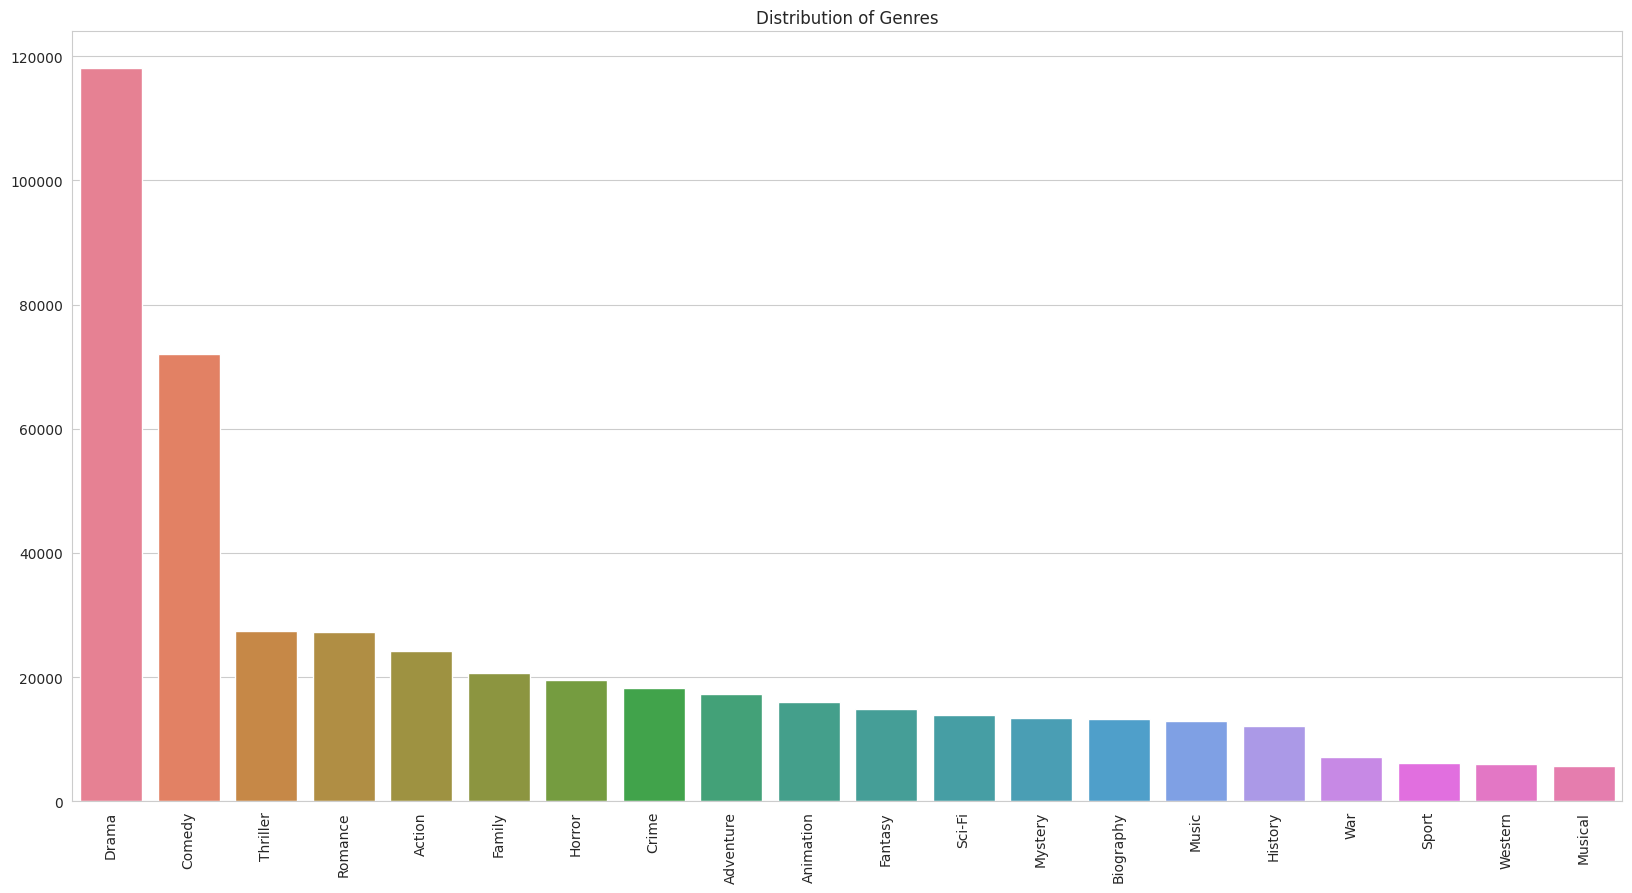

In [25]:
genre_dict

# sort the dictionary by value
genre_dict = dict(sorted(genre_dict.items(), key=lambda x: x[1], reverse=True))

# plot with seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Distribution of Genres')

# color the bars
colors = sns.color_palette('pastel')[0:len(genre_dict)]
sns.barplot(x=list(genre_dict.keys()), y=list(genre_dict.values()), hue=list(genre_dict.keys()), legend=False)
plt.show()

<Axes: title={'center': 'Distribution of Genres'}>

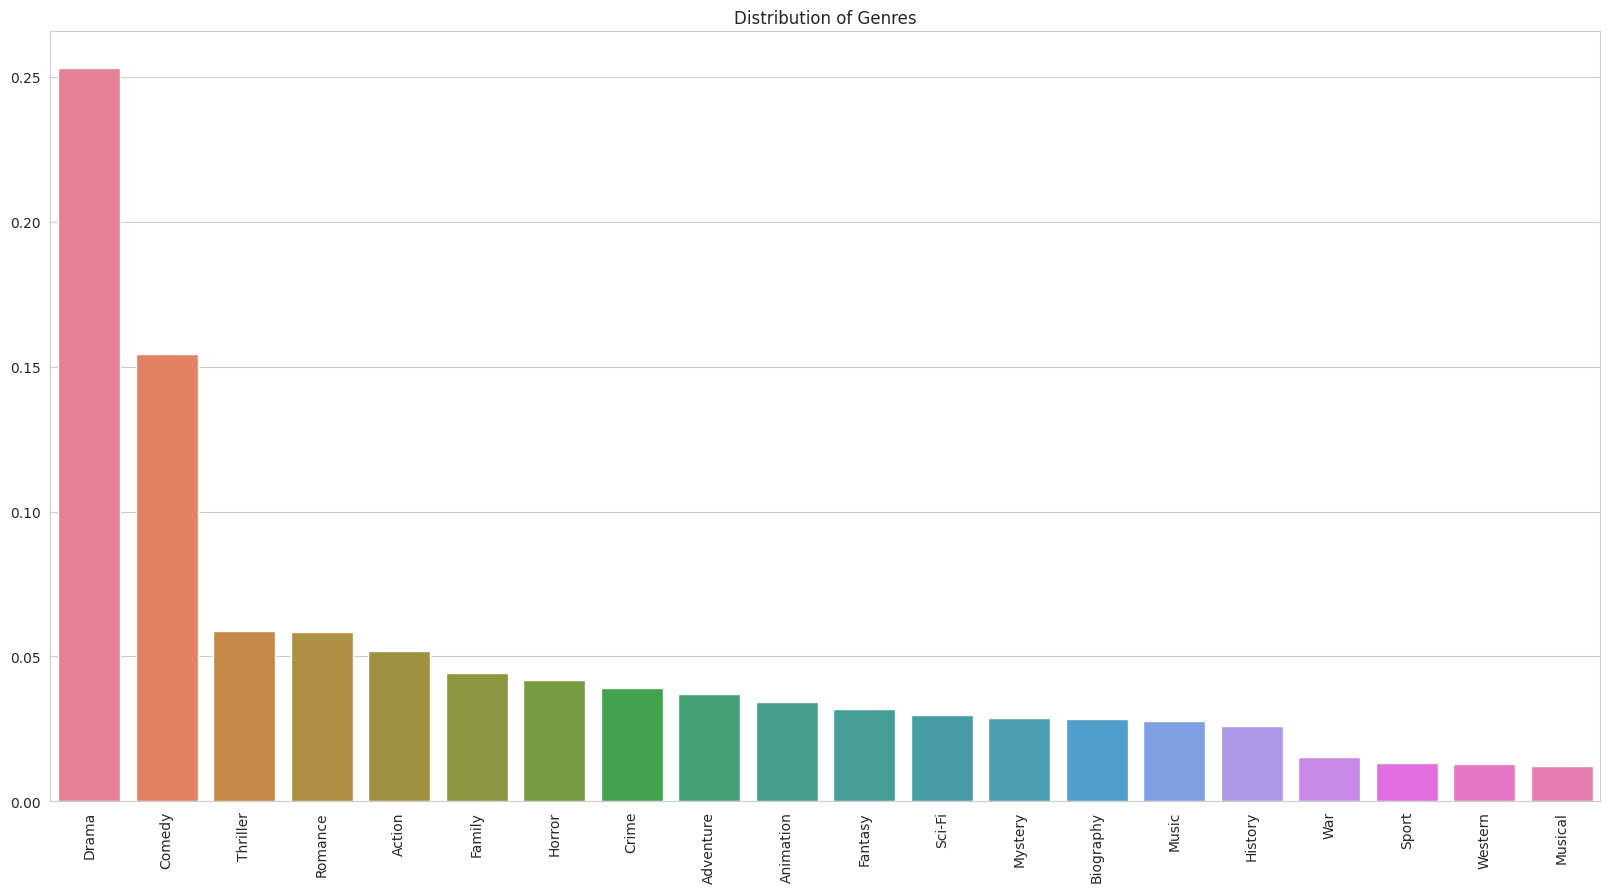

In [26]:
# show as percentage of total
total = sum(genre_dict.values())
percent_dict = {k: v / total for k, v in genre_dict.items()}

# plot with seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Distribution of Genres')
sns.barplot(x=list(percent_dict.keys()), y=list(percent_dict.values()), hue=list(percent_dict.keys()), legend=False)

<Axes: title={'center': 'Distribution of Number of Genres'}>

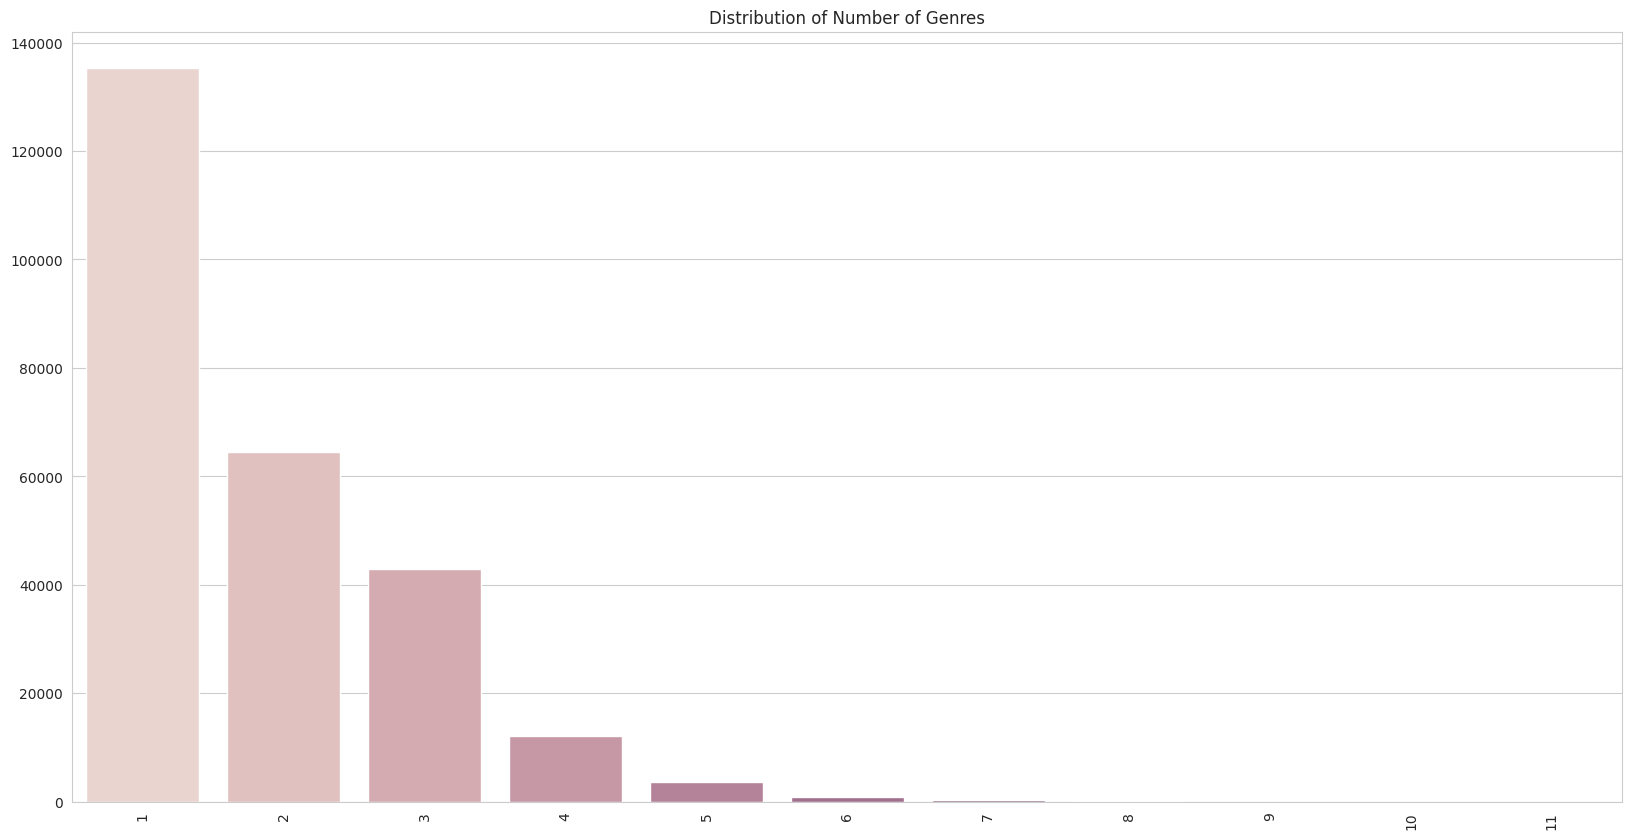

In [27]:
# plot a cdf for the number of genres
genre_count = [len(genres[1:-1].split(', ')) for genres in df['genres']]
genre_count_dict = {}

for count in genre_count:
    if count not in genre_count_dict:
        genre_count_dict[count] = 1
    else:
        genre_count_dict[count] += 1

genre_count_dict = dict(sorted(genre_count_dict.items(), key=lambda x: x[0], reverse=False))

# plot with seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Distribution of Number of Genres')
sns.barplot(x=list(genre_count_dict.keys()), y=list(genre_count_dict.values()), hue=list(genre_count_dict.keys()), legend=False)

/tmp/ipykernel_7122/4207840222.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plot_length)


<Axes: title={'center': 'Distribution of Plot Length'}, ylabel='Density'>

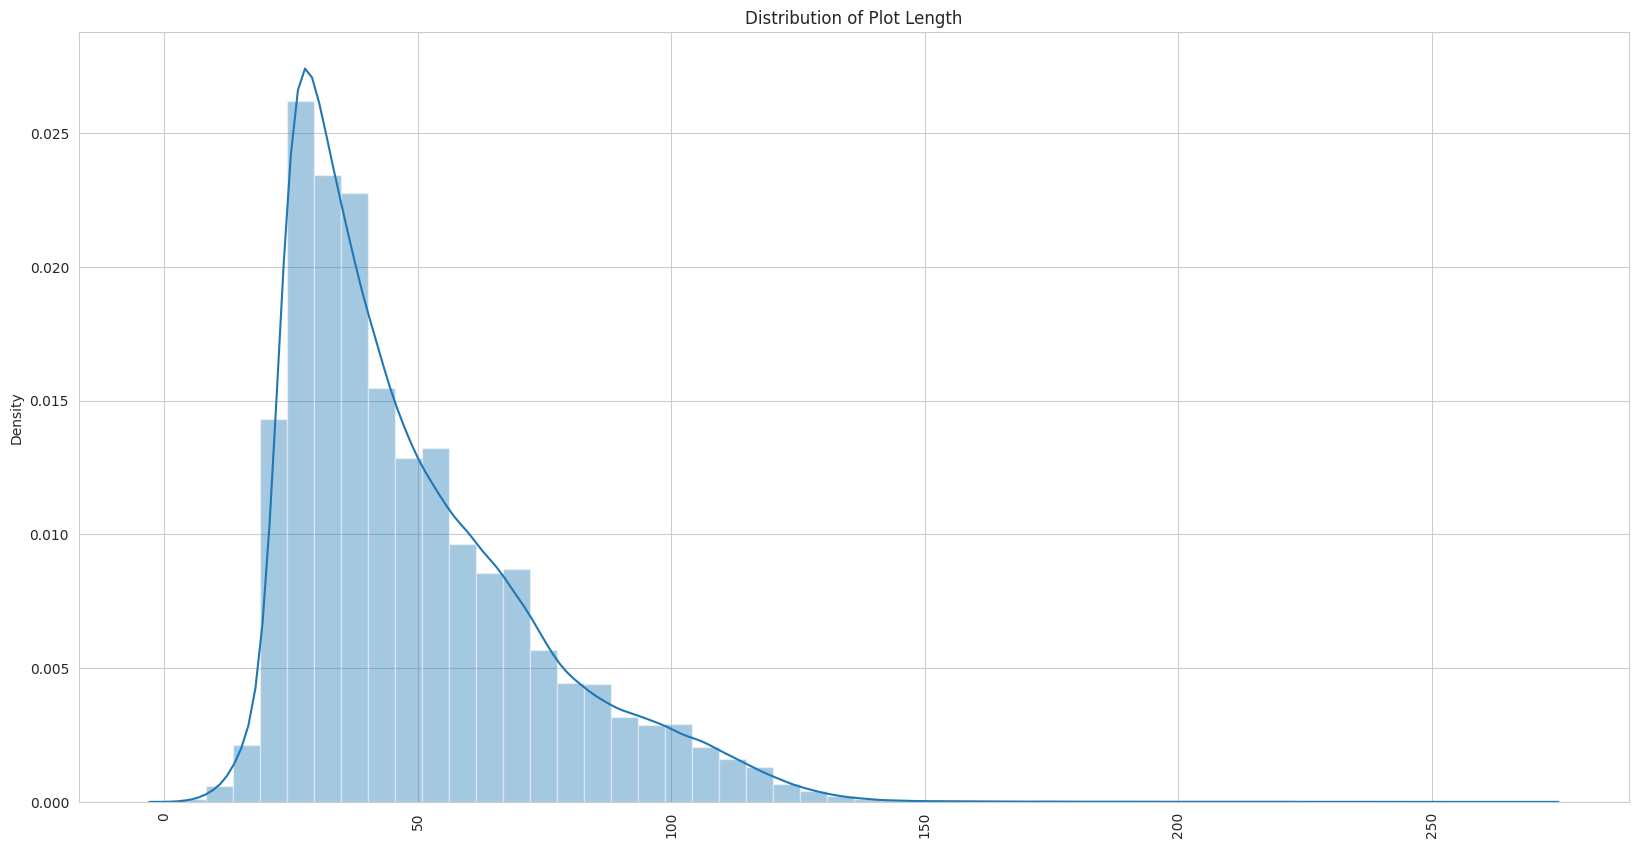

In [46]:
# make a density plot of the length of the plot
plot_length = [len(plot.split(' ')) for plot in df['plot']]
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Distribution of Plot Length')
sns.distplot(plot_length)

Number of words in whole data: 88236189


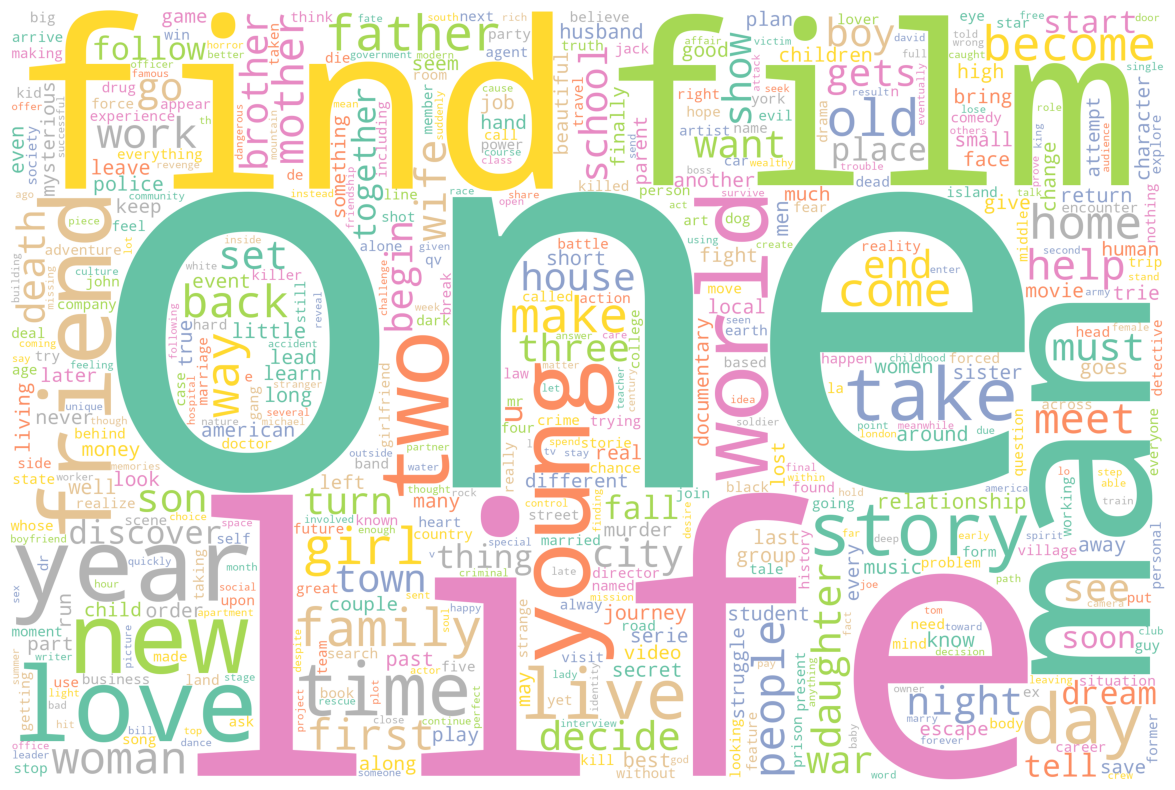

In [41]:
# create a word cloud for the plots
from wordcloud import WordCloud

text = ' '.join(df['plot'])
print('Number of words in whole data:', len(text))
wordcloud = WordCloud(width=3000, height=2000,max_words=500, random_state=1, background_color='white', colormap='Set2', collocations=False).generate(text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [65]:
import json

embedding_matrix = np.load('vectorizers/embedding_matrix_w2v.npy')
word2idx = None
with open('./vectorizers/word2idx.json', 'rb') as f:
    word2idx = json.load(f)

In [66]:
print(embedding_matrix.shape)

(132816, 300)


In [67]:
def get_avg_embeddings(data):
    average_embeddings = []
    for plot in data:
        plot_embeddings = []
        for word in plot:
            if word in word2idx:
                plot_embeddings.append(embedding_matrix[word2idx[word]])
            else:
                plot_embeddings.append(embedding_matrix[word2idx['<UNK>']])
        plot_embeddings = np.array(plot_embeddings)
        
        average_embeddings.append(np.mean(plot_embeddings, axis=0))
        
    average_embeddings = np.array(average_embeddings)
    
    return average_embeddings

In [68]:
sample_plot = df['plot'][0]
sample_plot

'days later interactive comedy series featuring ensemble cast youtube celebrities week audience writes brief via social media new episode featuring well known guest star seven days later week episode premieres tv across multiple platforms'

In [69]:
# get the average embeddings for the plots
embeddings = get_avg_embeddings(df['plot'])
embeddings.shape

(259557, 300)

In [72]:
# perform PCA on the embeddings
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings)
pca_embeddings = pca.transform(embeddings)
pca_embeddings.shape

(259557, 2)

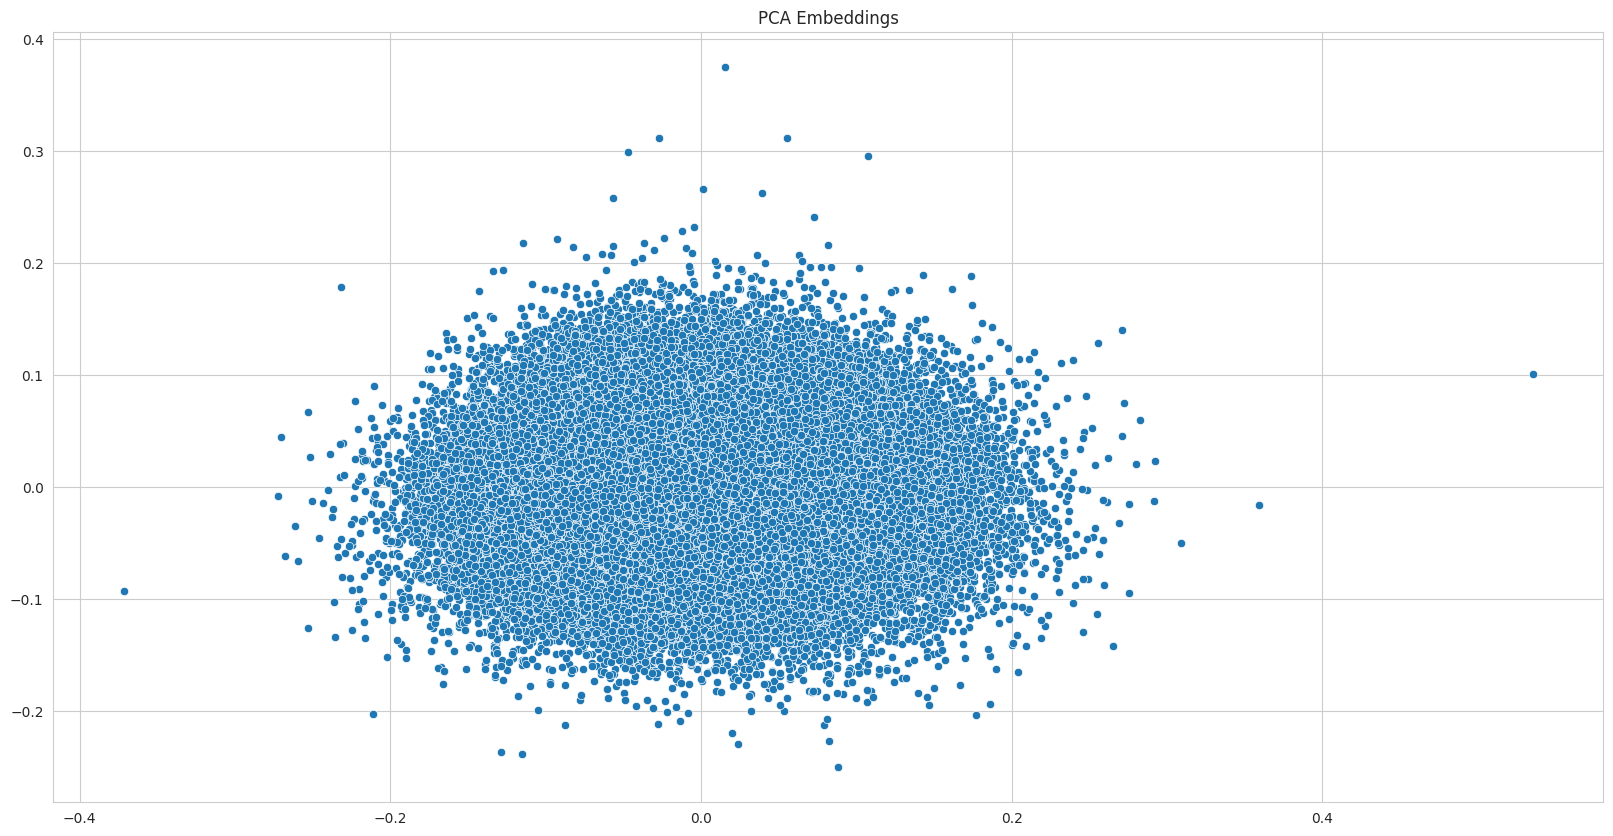

In [73]:
# plot the embeddings after PCA
plt.figure(figsize=(20, 10))
sns.scatterplot(x=pca_embeddings[:, 0], y=pca_embeddings[:, 1])
plt.title('PCA Embeddings')
plt.show()